### QUESTION ###
**Which countries consume the highest levels of sugar, fat, protein, and fiber? Are there regional patterns (e.g., Western diets vs. Asian diets)?**

In [35]:
import pandas as pd
import numpy as np

In [36]:
df_diet = pd.read_csv('../RawData/Diet-Compositions/Diet compositions by commodity categories - FAO (2017).csv')

In [37]:
df_diet.head()

,Entity,Year,Cereals and Grains (FAO (2017)) (kilocalories per person per day),Pulses (FAO (2017)) (kilocalories per person per day),Starchy Roots (FAO (2017)) (kilocalories per person per day),Sugar (FAO (2017)) (kilocalories per person per day),Oils & Fats (FAO (2017)) (kilocalories per person per day),Meat (FAO (2017)) (kilocalories per person per day),Dairy & Eggs (FAO (2017)) (kilocalories per person per day),Fruit and Vegetables (FAO (2017)) (kilocalories per person per day),Other (FAO (2017)) (kilocalories per person per day),Alcoholic Beverages (FAO (2017)) (kilocalories per person per day)
0,Afghanistan,1961,2530,16,25,51,92,88,102,82,13,0.0
1,Afghanistan,1962,2458,17,22,45,98,88,101,76,12,0.0
2,Afghanistan,1963,2212,17,23,47,106,91,110,79,13,0.0
3,Afghanistan,1964,2445,18,24,55,102,93,110,95,11,0.0
4,Afghanistan,1965,2431,18,24,57,105,95,118,95,13,0.0


In [38]:
df_diet.columns = df_diet.columns.str.strip()

print("Missing values before handling:")
print(df_diet.isnull().sum())

numerical_cols = df_diet.select_dtypes(include=np.number).columns
df_diet[numerical_cols] = df_diet[numerical_cols].fillna(0)

print("\nMissing values after handling:")
print(df_diet.isnull().sum())

print("Column names after stripping whitespace:")
print(df_diet.columns.tolist())

Missing values before handling:
Entity                                                                  0
Year                                                                    0
Cereals and Grains (FAO (2017)) (kilocalories per person per day)       0
Pulses (FAO (2017)) (kilocalories per person per day)                   0
Starchy Roots (FAO (2017)) (kilocalories per person per day)            0
Sugar (FAO (2017)) (kilocalories per person per day)                    0
Oils & Fats (FAO (2017)) (kilocalories per person per day)              0
Meat (FAO (2017)) (kilocalories per person per day)                     0
Dairy & Eggs (FAO (2017)) (kilocalories per person per day)             0
Fruit and Vegetables (FAO (2017)) (kilocalories per person per day)     0
Other (FAO (2017)) (kilocalories per person per day)                    0
Alcoholic Beverages (FAO (2017)) (kilocalories per person per day)     53
dtype: int64

Missing values after handling:
Entity                             

In [39]:
sugar_col = 'Sugar (FAO (2017)) (kilocalories per person per day)'
fat_col = 'Oils & Fats (FAO (2017)) (kilocalories per person per day)'

protein_col = 'Protein (kcal/person/day)'
df_diet[protein_col] = df_diet['Meat (FAO (2017)) (kilocalories per person per day)'] + \
                       df_diet['Dairy & Eggs (FAO (2017)) (kilocalories per person per day)']

fiber_col = 'Fiber (kcal/person/day)'
df_diet[fiber_col] = df_diet['Cereals and Grains (FAO (2017)) (kilocalories per person per day)'] + \
                     df_diet['Pulses (FAO (2017)) (kilocalories per person per day)'] + \
                     df_diet['Starchy Roots (FAO (2017)) (kilocalories per person per day)'] + \
                     df_diet['Fruit and Vegetables (FAO (2017)) (kilocalories per person per day)']

print("Updated Column Names:")
print(df_diet.columns.tolist())

print("\nFirst 5 Rows with new columns:")
print(df_diet.head())

Updated Column Names:
['Entity', 'Year', 'Cereals and Grains (FAO (2017)) (kilocalories per person per day)', 'Pulses (FAO (2017)) (kilocalories per person per day)', 'Starchy Roots (FAO (2017)) (kilocalories per person per day)', 'Sugar (FAO (2017)) (kilocalories per person per day)', 'Oils & Fats (FAO (2017)) (kilocalories per person per day)', 'Meat (FAO (2017)) (kilocalories per person per day)', 'Dairy & Eggs (FAO (2017)) (kilocalories per person per day)', 'Fruit and Vegetables (FAO (2017)) (kilocalories per person per day)', 'Other (FAO (2017)) (kilocalories per person per day)', 'Alcoholic Beverages (FAO (2017)) (kilocalories per person per day)', 'Protein (kcal/person/day)', 'Fiber (kcal/person/day)']

First 5 Rows with new columns:
        Entity  Year  \
0  Afghanistan  1961   
1  Afghanistan  1962   
2  Afghanistan  1963   
3  Afghanistan  1964   
4  Afghanistan  1965   

   Cereals and Grains (FAO (2017)) (kilocalories per person per day)  \
0                              

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8154 entries, 0 to 8153
Data columns (total 12 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Entity                                                               8154 non-null   object 
 1   Year                                                                 8154 non-null   int64  
 2   Cereals and Grains (FAO (2017)) (kilocalories per person per day)    8154 non-null   int64  
 3   Pulses (FAO (2017)) (kilocalories per person per day)                8154 non-null   int64  
 4   Starchy Roots (FAO (2017)) (kilocalories per person per day)         8154 non-null   int64  
 5   Sugar (FAO (2017)) (kilocalories per person per day)                 8154 non-null   int64  
 6   Oils & Fats (FAO (2017)) (kilocalories per person per day)           8154 non-null   int64  
 7   Meat (

In [41]:

df_filtered_years = df_diet[(df_diet['Year'] >= 1991) & (df_diet['Year'] <= 2013)].copy()

target_countries = ['United States', 'India', 'China', 'Brazil', 'United Kingdom']

current_countries = df_filtered_years['Entity'].unique()
missing_countries = [country for country in target_countries if country not in current_countries]

if missing_countries:
    print(f"Missing target countries: {', '.join(missing_countries)}")
    print("Identifying top 5 consuming countries instead.")

    kcal_cols = [col for col in df_filtered_years.columns if 'kilocalories' in col or '(kcal/person/day)' in col]

    df_filtered_years['total_calories'] = df_filtered_years[kcal_cols].sum(axis=1)


    average_calories_by_country = df_filtered_years.groupby('Entity')['total_calories'].mean().nlargest(5)
    final_countries = average_calories_by_country.index.tolist()
    print(f"Using top 5 consuming countries: {', '.join(final_countries)}")
else:
    print("All target countries are present.")
    final_countries = target_countries


df_trend = df_filtered_years[df_filtered_years['Entity'].isin(final_countries)].copy()


print("\nUnique entities in df_trend:")
print(df_trend['Entity'].unique())
print("\nYear range in df_trend:")
print(f"Min Year: {df_trend['Year'].min()}, Max Year: {df_trend['Year'].max()}")

print("\nFirst 5 rows of df_trend:")
print(df_trend.head())

All target countries are present.

Unique entities in df_trend:
['Brazil' 'China' 'India' 'United Kingdom' 'United States']

Year range in df_trend:
Min Year: 1991, Max Year: 2013

First 5 rows of df_trend:
     Entity  Year  \
980  Brazil  1991   
981  Brazil  1992   
982  Brazil  1993   
983  Brazil  1994   
984  Brazil  1995   

     Cereals and Grains (FAO (2017)) (kilocalories per person per day)  \
980                                                912                   
981                                                912                   
982                                                930                   
983                                                918                   
984                                                862                   

     Pulses (FAO (2017)) (kilocalories per person per day)  \
980                                                144       
981                                                147       
982                                

In [42]:
df.head()

,Entity,Year,Cereals and Grains (FAO (2017)) (kilocalories per person per day),Pulses (FAO (2017)) (kilocalories per person per day),Starchy Roots (FAO (2017)) (kilocalories per person per day),Sugar (FAO (2017)) (kilocalories per person per day),Oils & Fats (FAO (2017)) (kilocalories per person per day),Meat (FAO (2017)) (kilocalories per person per day),Dairy & Eggs (FAO (2017)) (kilocalories per person per day),Fruit and Vegetables (FAO (2017)) (kilocalories per person per day),Other (FAO (2017)) (kilocalories per person per day),Alcoholic Beverages (FAO (2017)) (kilocalories per person per day)
0,Afghanistan,1961,2530,16,25,51,92,88,102,82,13,0.0
1,Afghanistan,1962,2458,17,22,45,98,88,101,76,12,0.0
2,Afghanistan,1963,2212,17,23,47,106,91,110,79,13,0.0
3,Afghanistan,1964,2445,18,24,55,102,93,110,95,11,0.0
4,Afghanistan,1965,2431,18,24,57,105,95,118,95,13,0.0


Analyze and Visualize Fat Trend

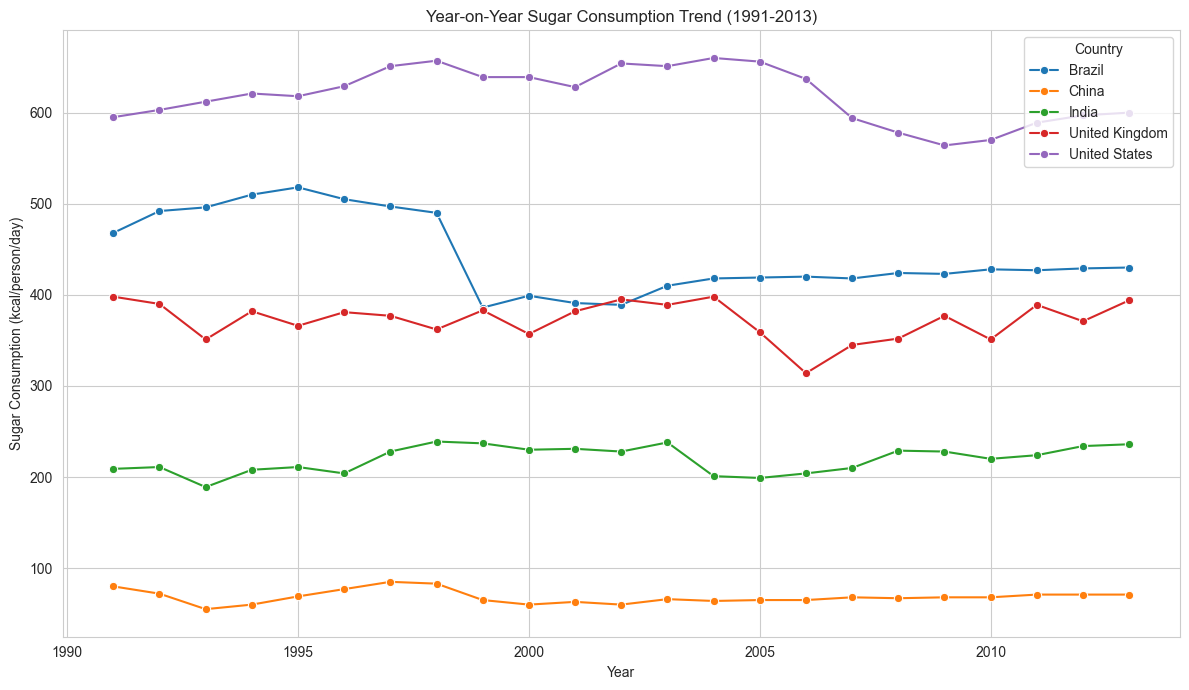

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("whitegrid")


plt.figure(figsize=(12, 7))
sns.lineplot(data=df_trend, x='Year', y=sugar_col, hue='Entity', marker='o')


plt.title('Year-on-Year Sugar Consumption Trend (1991-2013)')
plt.xlabel('Year')
plt.ylabel('Sugar Consumption (kcal/person/day)')

plt.legend(title='Country')


plt.tight_layout()
plt.show()

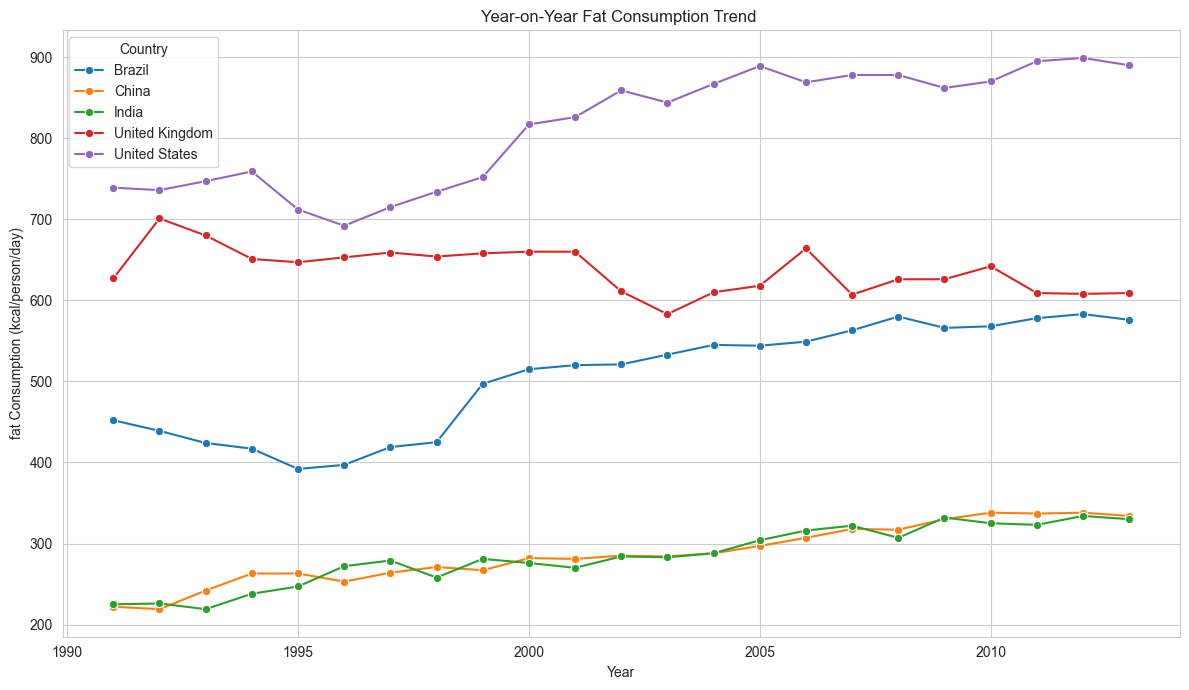

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for the plots for better aesthetics
sns.set_style("whitegrid")

# Create the line plot for sugar consumption trend
plt.figure(figsize=(12, 7))
sns.lineplot(data=df_trend, x='Year', y=fat_col, hue='Entity', marker='o')

# Set plot title and labels
plt.title('Year-on-Year Fat Consumption Trend ')
plt.xlabel('Year')
plt.ylabel('fat Consumption (kcal/person/day)')

# Display legend
plt.legend(title='Country')

# Improve layout and display the plot
plt.tight_layout()
plt.show()

Analyze and Visualize Protein Trend

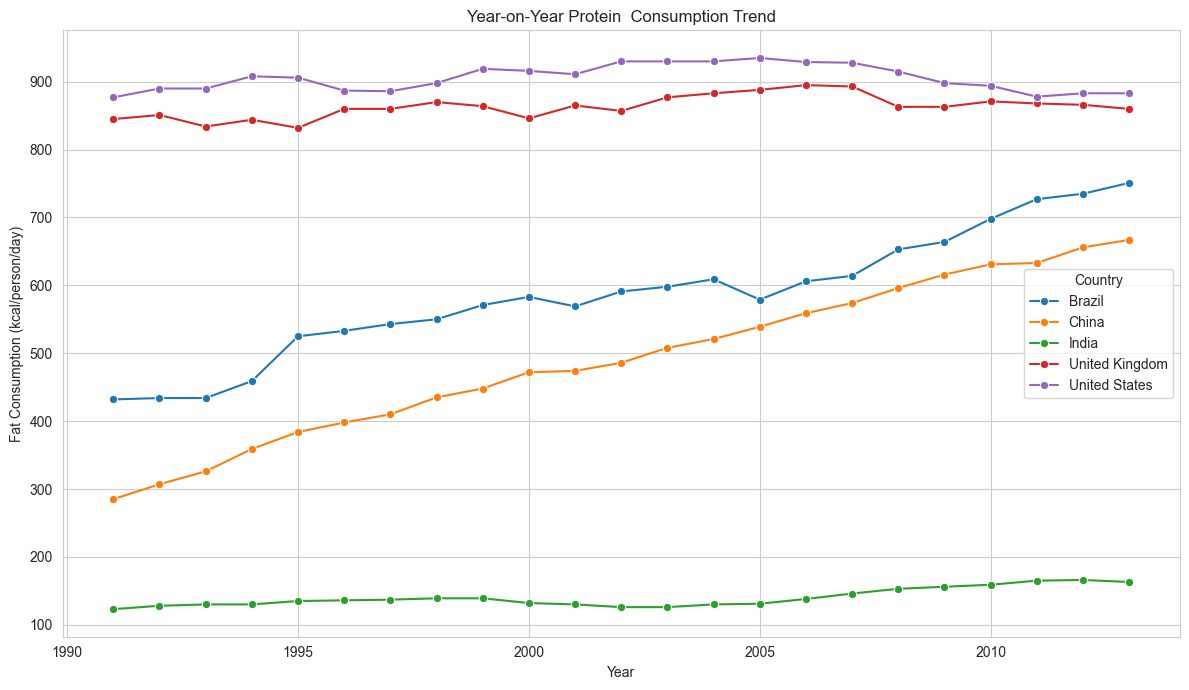

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("whitegrid")

# Create the line plot for fat consumption trend
plt.figure(figsize=(12, 7))
sns.lineplot(data=df_trend, x='Year', y=protein_col, hue='Entity', marker='o')

# Set plot title and labels
plt.title('Year-on-Year Protein  Consumption Trend')
plt.xlabel('Year')
plt.ylabel('protein Consumption (kcal/person/day)')

# Display legend
plt.legend(title='Country')

# Improve layout and display the plot
plt.tight_layout()
plt.show()

Analyze and Visualize Fiber Trend

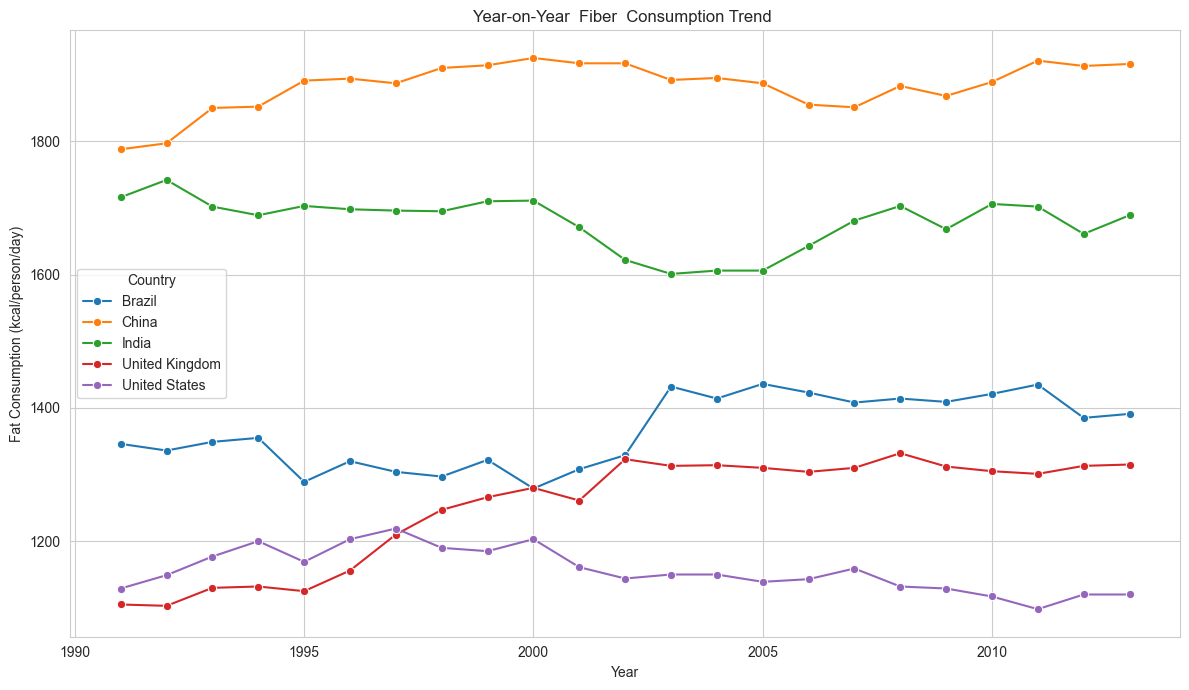

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for the plots for better aesthetics
sns.set_style("whitegrid")

# Create the line plot for fat consumption trend
plt.figure(figsize=(12, 7))
sns.lineplot(data=df_trend, x='Year', y=fiber_col, hue='Entity', marker='o')

# Set plot title and labels
plt.title('Year-on-Year  Fiber  Consumption Trend ')
plt.xlabel('Year')
plt.ylabel('Fat Consumption (kcal/person/day)')

# Display legend
plt.legend(title='Country')

# Improve layout and display the plot
plt.tight_layout()
plt.show()

In [46]:
nutrient_cols = [sugar_col, fat_col, protein_col, fiber_col]
df_avg_consumption = df_trend.groupby('Entity')[nutrient_cols].mean().reset_index()

print("Average consumption per country:")
print(df_avg_consumption.head())

Average consumption per country:
           Entity  Sugar (FAO (2017)) (kilocalories per person per day)  \
0          Brazil                                         442.913043      
1           China                                          68.391304      
2           India                                         219.478261      
3  United Kingdom                                         372.304348      
4   United States                                         619.217391      

   Oils & Fats (FAO (2017)) (kilocalories per person per day)  \
0                                         504.478261            
1                                         286.956522            
2                                         284.304348            
3                                         637.521739            
4                                         814.304348            

   Protein (kcal/person/day)  Fiber (kcal/person/day)  
0                 585.130435              1365.304348  
1            

 Countries by Average Sugar Consumption:
        Entity  Sugar (FAO (2017)) (kilocalories per person per day)
 United States                                            619.217391
        Brazil                                            442.913043
United Kingdom                                            372.304348
         India                                            219.478261
         China                                             68.391304


/var/folders/cr/2thq8qhx32sdzjtfv83rs46h0000gn/T/ipykernel_57256/1683041114.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Entity', y=sugar_col, data=sugar_ranking, palette='viridis')


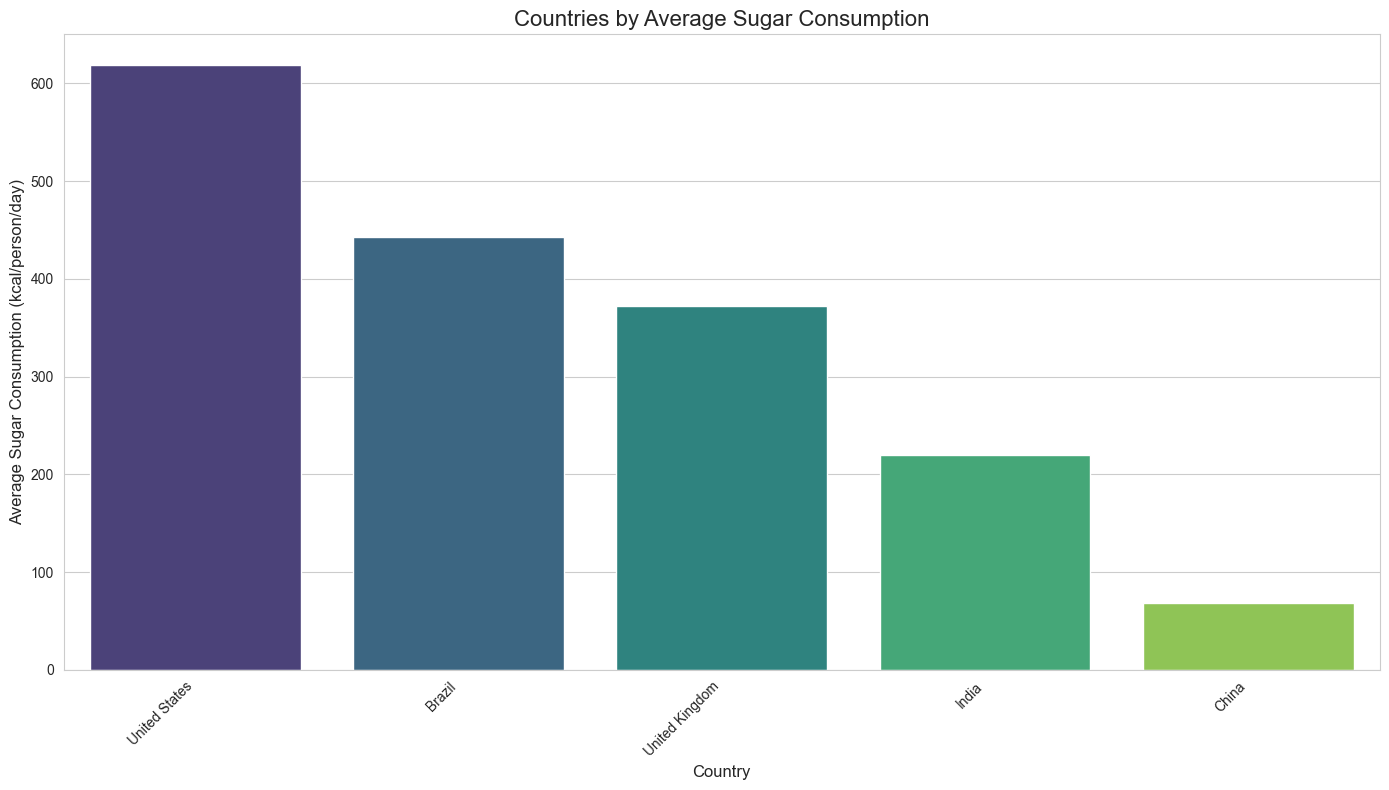

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns


sugar_ranking = df_avg_consumption.sort_values(by=sugar_col, ascending=False).head(10)


print(" Countries by Average Sugar Consumption:")
print(sugar_ranking[['Entity', sugar_col]].to_string(index=False))


plt.figure(figsize=(14, 8))
sns.barplot(x='Entity', y=sugar_col, data=sugar_ranking, palette='viridis')


plt.title('Countries by Average Sugar Consumption', fontsize=16)


plt.xlabel('Country', fontsize=12)
plt.ylabel('Average Sugar Consumption (kcal/person/day)', fontsize=12)


plt.xticks(rotation=45, ha='right')
plt.tight_layout()


plt.show()

Contient analysis 


In [48]:
continent_mapping = {
    'USA': 'North America',
    'Canada': 'North America',
    'Mexico': 'North America',
    'Brazil': 'South America',
    'Colombia': 'South America',
    'Argentina': 'South America',
    'India': 'Asia',
    'China': 'Asia',
    'Japan': 'Asia',
    'United Kingdom': 'Europe',
    'UK': 'Europe',
    'Germany': 'Europe',
    'France': 'Europe',
    'Italy': 'Europe',
    'Spain': 'Europe',
    'Belgium': 'Europe',
    'Austria': 'Europe',
    'Ireland': 'Europe',
    'Iceland': 'Europe',
    'Luxembourg': 'Europe',
    'Finland': 'Europe',
    'Netherlands': 'Europe',
    'Switzerland': 'Europe',
    'Norway': 'Europe',
    'Montenegro': 'Europe',
    'Turkey': 'Asia', # Geopolitically often considered Euro-Asian, but for simplicity here assigned to Asia
    'Egypt': 'Africa',
    'Morocco': 'Africa',
    'Ghana': 'Africa',
    'Lesotho': 'Africa',
    'Tunisia': 'Africa',
    "Cote d'Ivoire": 'Africa',
    'Algeria': 'Africa',
    'South Africa': 'Africa',
    'Australia': 'Oceania',
    'New Zealand': 'Oceania',
    'Kiribati': 'Oceania',
    'Trinidad and Tobago': 'North America', # Caribbean is generally part of North America
    'Cuba': 'North America',
    'Costa Rica': 'North America',
    'Barbados': 'North America',
    'Malta': 'Europe',
    'Iran': 'Asia',
    'Bangladesh': 'Asia'
}

# Apply the mapping to create the 'Continent' column, with 'Other' for unmapped countries
df_diet['Continent'] = df_diet['Entity'].map(continent_mapping).fillna('Other')

# Display the first few rows with the new 'Continent' column
print("First 5 Rows of df_diet with new 'Continent' column:")
print(df_diet.head())

First 5 Rows of df_diet with new 'Continent' column:
        Entity  Year  \
0  Afghanistan  1961   
1  Afghanistan  1962   
2  Afghanistan  1963   
3  Afghanistan  1964   
4  Afghanistan  1965   

   Cereals and Grains (FAO (2017)) (kilocalories per person per day)  \
0                                               2530                   
1                                               2458                   
2                                               2212                   
3                                               2445                   
4                                               2431                   

   Pulses (FAO (2017)) (kilocalories per person per day)  \
0                                                 16       
1                                                 17       
2                                                 17       
3                                                 18       
4                                                 18       

   Starc

In [49]:
df_continental_years = df_diet[(df_diet['Year'] >= 1991) & (df_diet['Year'] <= 2013)].copy()

print("First 5 rows of df_continental_years after filtering by year:")
print(df_continental_years.head())

First 5 rows of df_continental_years after filtering by year:
         Entity  Year  \
30  Afghanistan  1991   
31  Afghanistan  1992   
32  Afghanistan  1993   
33  Afghanistan  1994   
34  Afghanistan  1995   

    Cereals and Grains (FAO (2017)) (kilocalories per person per day)  \
30                                               1475                   
31                                               1356                   
32                                               1438                   
33                                               1359                   
34                                               1309                   

    Pulses (FAO (2017)) (kilocalories per person per day)  \
30                                                 20       
31                                                 20       
32                                                 22       
33                                                 24       
34                                         

Average nutrient consumption by Continent (1991-2013):
       Continent  Sugar (FAO (2017)) (kilocalories per person per day)  \
0         Africa                                         238.668478      
1           Asia                                         201.210145      
2         Europe                                         406.722388      
3  North America                                         524.550725      
4        Oceania                                         463.449275      

   Oils & Fats (FAO (2017)) (kilocalories per person per day)  \
0                                         326.646739            
1                                         378.173913            
2                                         655.952239            
3                                         464.869565            
4                                         673.869565            

   Protein (kcal/person/day)  Fiber (kcal/person/day)  
0                 212.701087              2091.717391

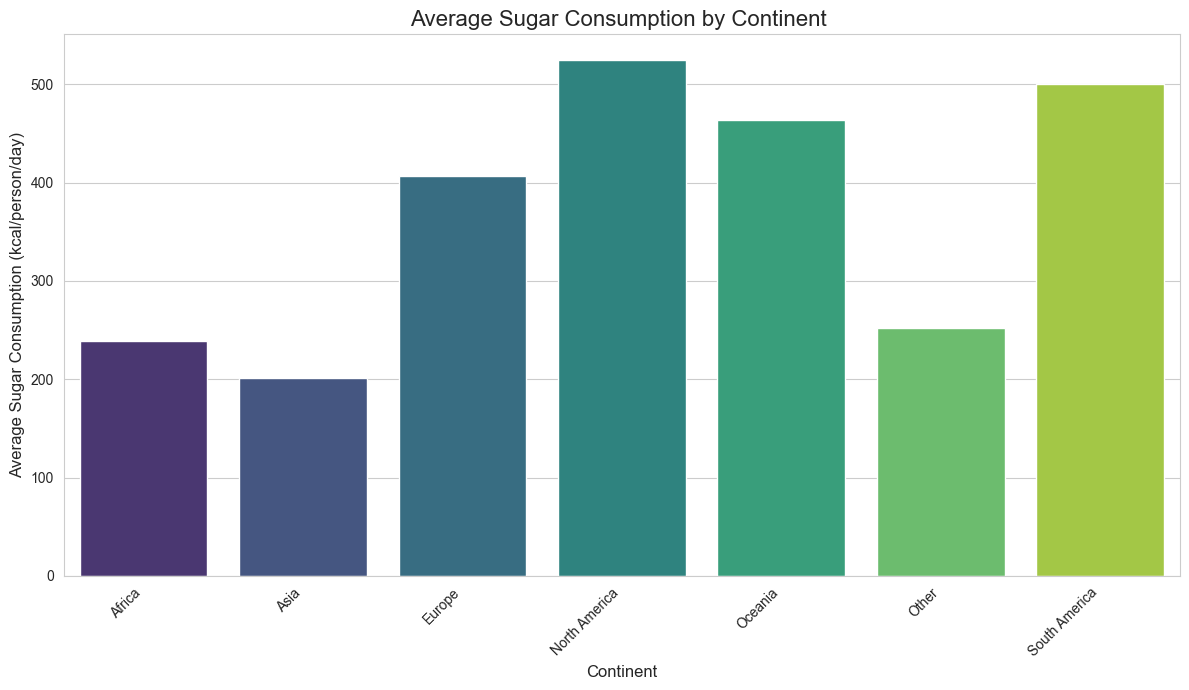

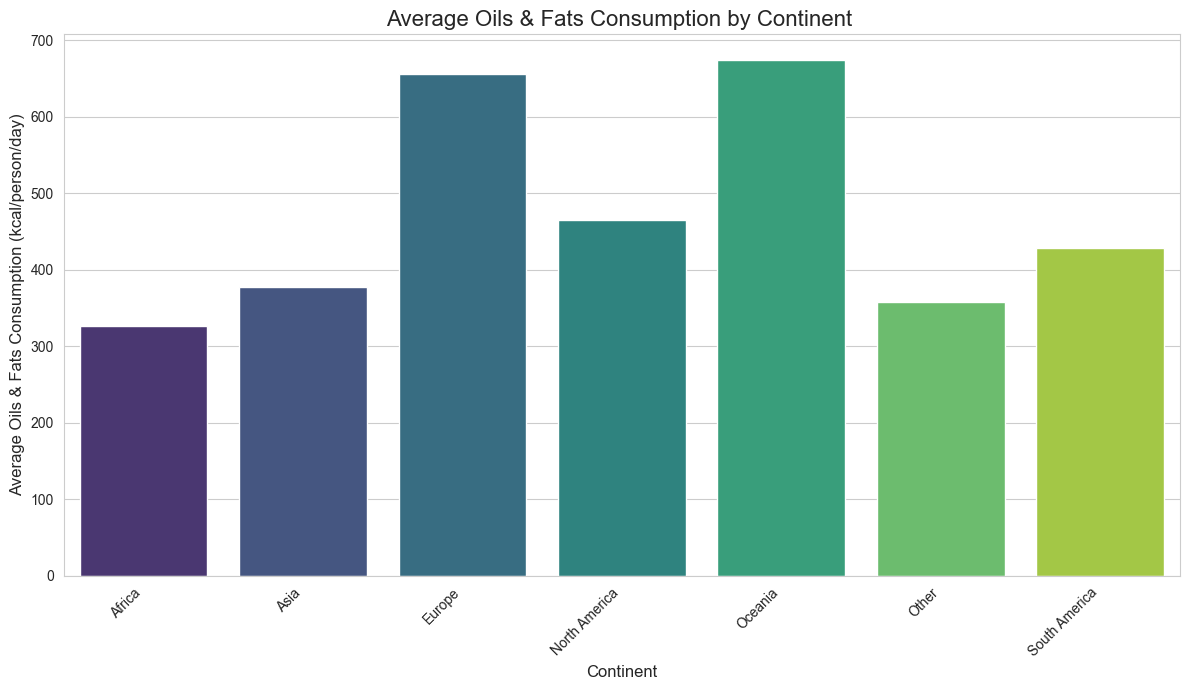

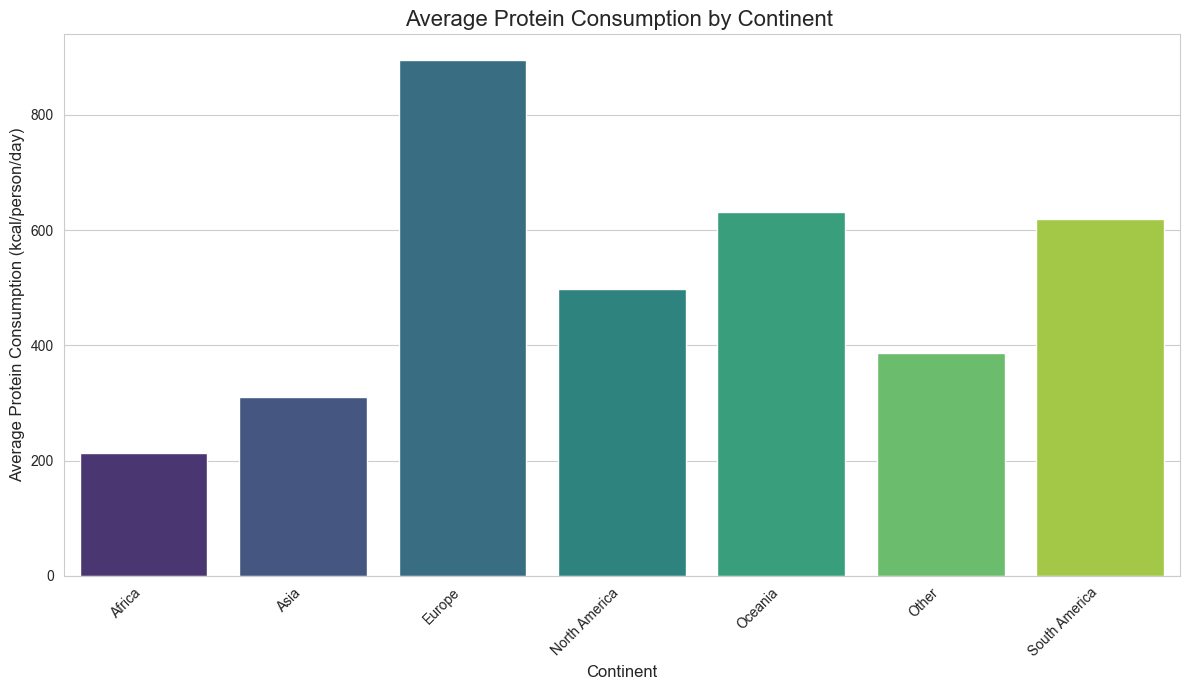

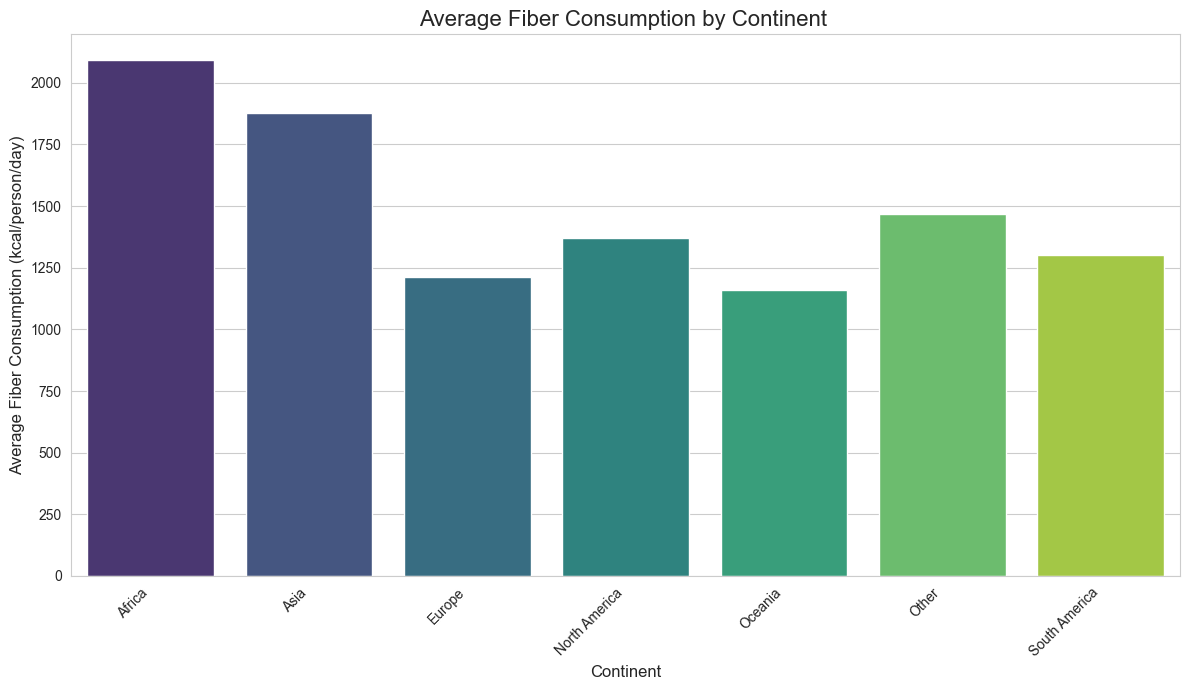

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("whitegrid")


nutrient_cols = [sugar_col, fat_col, protein_col, fiber_col]


df_continental_avg_consumption = df_continental_years.groupby('Continent')[nutrient_cols].mean().reset_index()

print("Average nutrient consumption by Continent (1991-2013):")
print(df_continental_avg_consumption.head())


for nutrient in nutrient_cols:
    plt.figure(figsize=(12, 7))
    sns.barplot(x='Continent', y=nutrient, data=df_continental_avg_consumption, palette='viridis', hue='Continent', legend=False)


    plt.title(f'Average {nutrient.split(" (")[0]} Consumption by Continent ', fontsize=16)


    plt.xlabel('Continent', fontsize=12)
    plt.ylabel(f'Average {nutrient.split(" (")[0]} Consumption (kcal/person/day)', fontsize=12)


    plt.xticks(rotation=45, ha='right')


    plt.tight_layout()
    plt.show()

First 5 rows of df_continental_trends:
   Year      Continent  Sugar (FAO (2017)) (kilocalories per person per day)  \
0  1991         Africa                                         231.500000      
1  1991           Asia                                         208.000000      
2  1991         Europe                                         415.615385      
3  1991  North America                                         496.333333      
4  1991        Oceania                                         444.666667      

   Oils & Fats (FAO (2017)) (kilocalories per person per day)  \
0                                         302.250000            
1                                         321.166667            
2                                         651.076923            
3                                         464.833333            
4                                         641.000000            

   Protein (kcal/person/day)  Fiber (kcal/person/day)  
0                 183.625000     

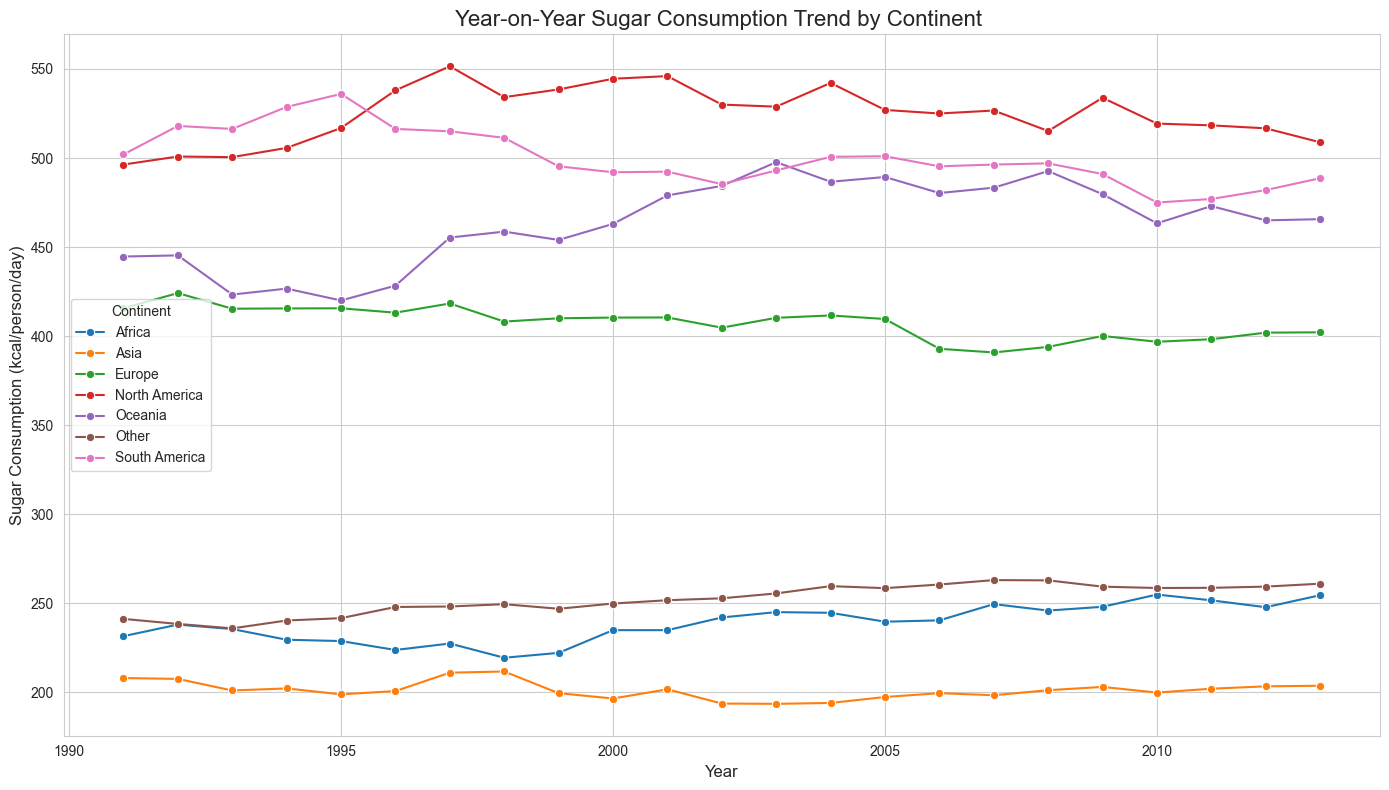

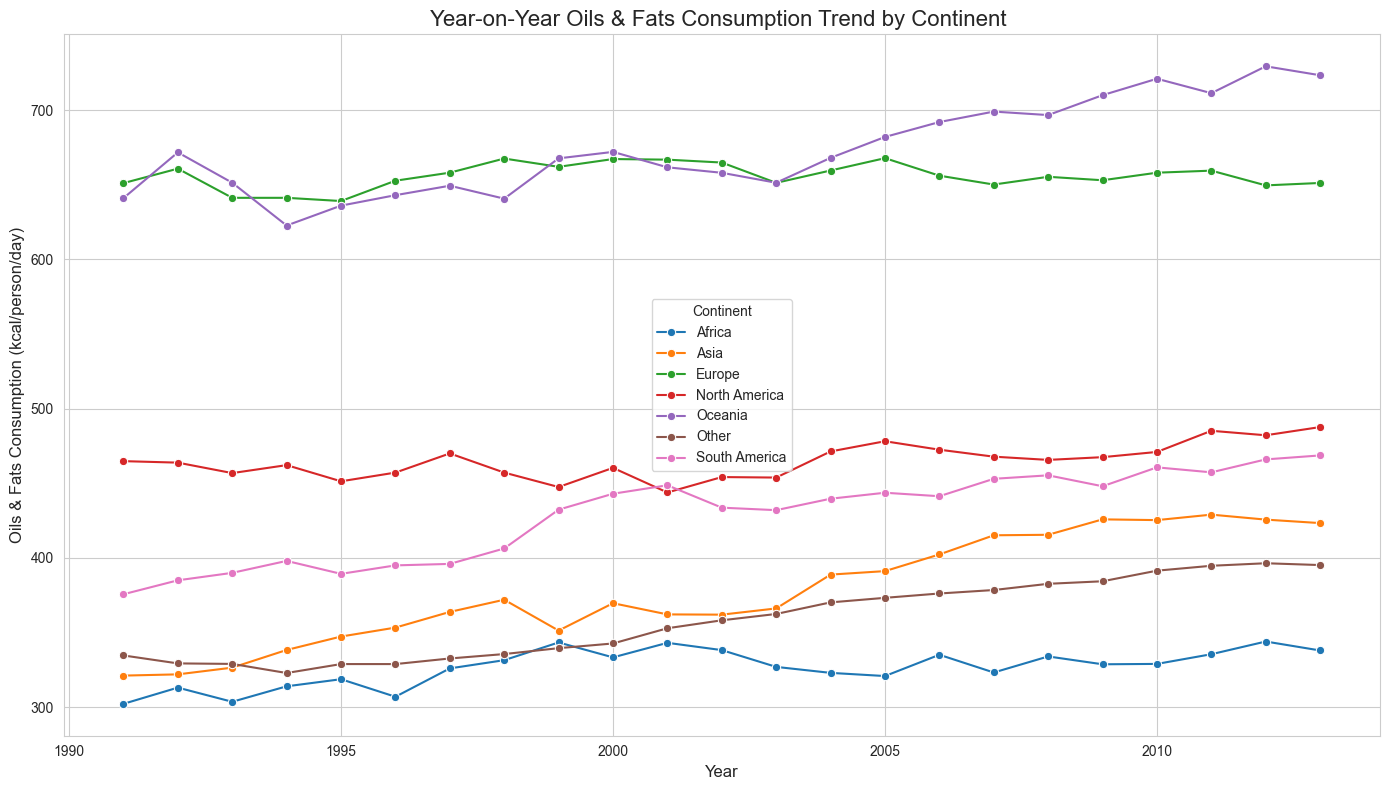

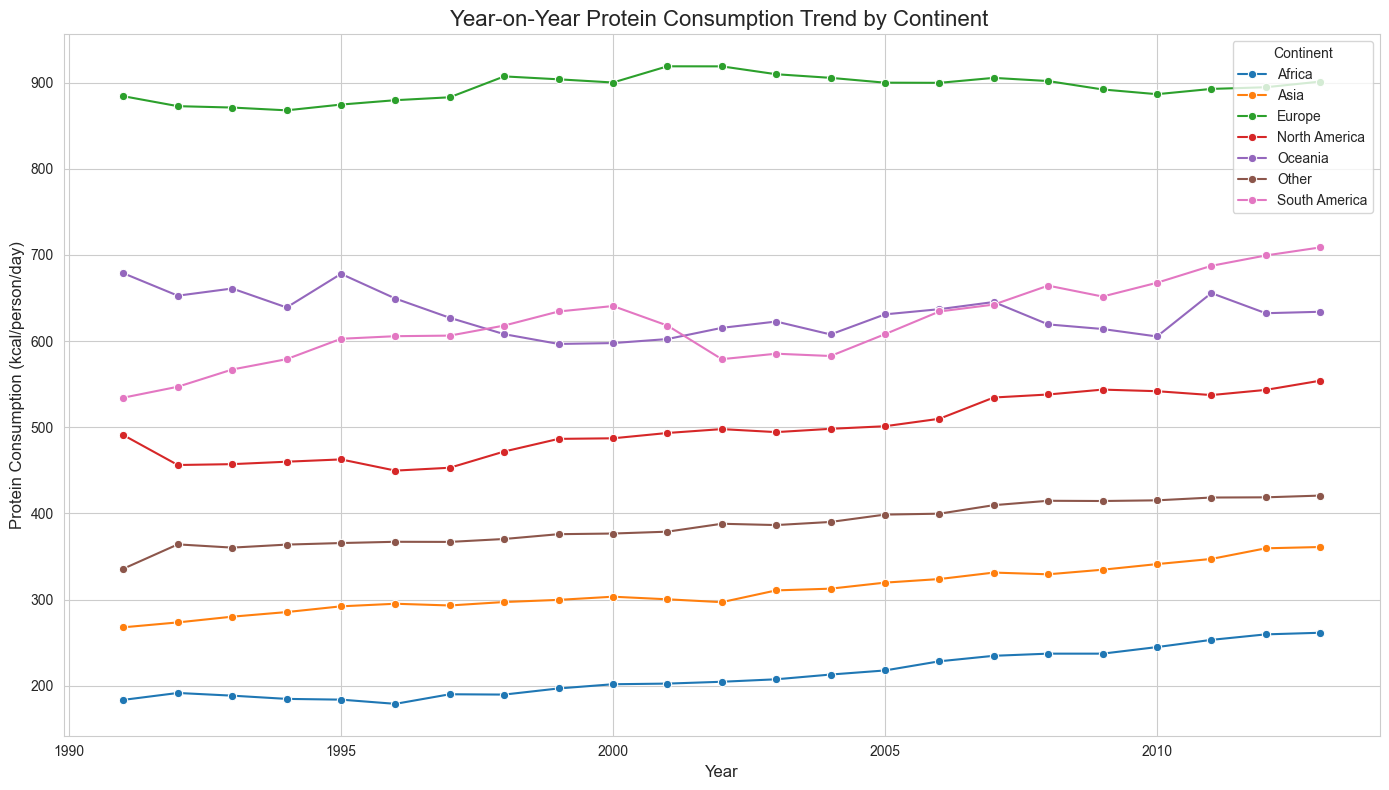

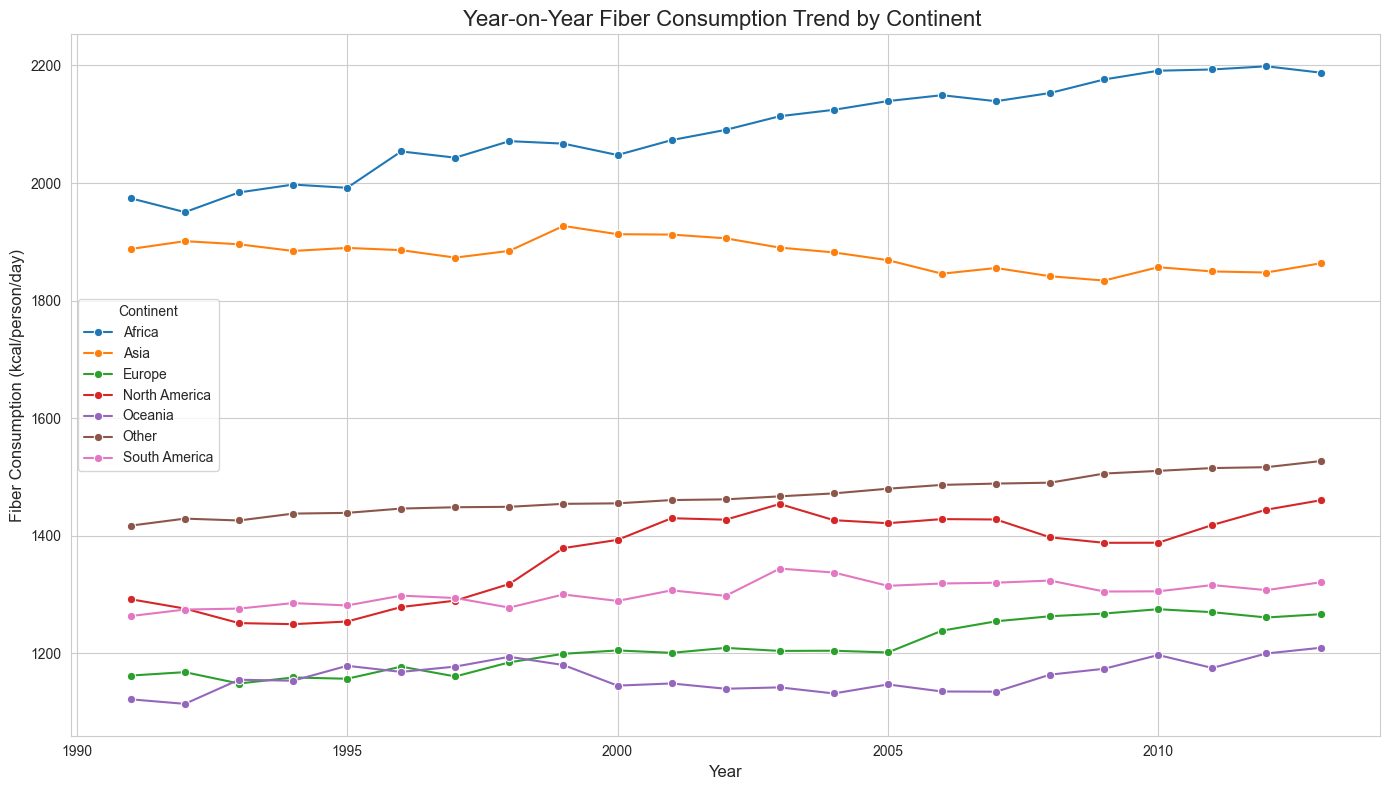

In [51]:

sns.set_style("whitegrid")


nutrient_cols = [sugar_col, fat_col, protein_col, fiber_col]


df_continental_trends = df_continental_years.groupby(['Year', 'Continent'])[nutrient_cols].mean().reset_index()

print("First 5 rows of df_continental_trends:")
print(df_continental_trends.head())


for nutrient in nutrient_cols:
    plt.figure(figsize=(14, 8))
    sns.lineplot(data=df_continental_trends, x='Year', y=nutrient, hue='Continent', marker='o')


    plt.title(f'Year-on-Year {nutrient.split(" (")[0]} Consumption Trend by Continent ', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel(f'{nutrient.split(" (")[0]} Consumption (kcal/person/day)', fontsize=12)


    plt.legend(title='Continent')


    plt.tight_layout()
    plt.show()

## Detailed Nutritional Consumption Report  

This revised report comprehensively analyzes year-on-year trends and average consumption patterns of sugar, fat, protein, and fiber, incorporating a new continent-based analysis alongside previous country-specific insights. The analysis spans the period 1991-2013, utilizing data from the FAO 2017 dataset.

### 1. Top Consuming Countries 

This section identifies the top 3 countries with the highest average consumption for each nutrient across all available countries in the dataset for the specified period.

*   **Sugar Consumption (kcal/person/day)**:
    *   **United States**: 619.22
    *   **Colombia**: 601.04
    *   **Trinidad and Tobago**: 578.83
    *   *Observation*: The highest sugar consumption is predominantly seen in North and South American countries, indicating a potentially higher intake of processed foods and sugary beverages in these regions.

*   **Fat Consumption (kcal/person/day)**:
    *   **Belgium**: 1004.64
    *   **Austria**: 910.52
    *   **Canada**: 864.78
    *   *Observation*: European and North American countries dominate the top fat consumers, suggesting diets rich in fats, likely from dairy, meat, and oils.

*   **Protein Consumption (kcal/person/day)**:
    *   **Iceland**: 1187.09
    *   **Luxembourg**: 1101.93
    *   **Finland**: 1045.70
    *   *Observation*: Nordic and Western European countries show the highest protein intake, likely due to a higher consumption of meat and dairy products.

*   **Fiber Consumption (kcal/person/day)**:
    *   **Egypt**: 2580.09
    *   **Turkey**: 2287.96
    *   **Morocco**: 2226.61
    *   *Observation*: Countries in North Africa and the Middle East, along with some Sub-Saharan African nations, lead in fiber consumption, suggesting diets rich in cereals, pulses, starchy roots, and fruits/vegetables.

### 2. Year-on-Year Trends (Selected Countries:  Brazil, united States, India, China, United Kingdom)

The analysis of year-on-year trends for sugar, fat, protein, and fiber consumption in  Brazil, United States, India, China and  UK reveals diverse patterns:

*   **Sugar Consumption**: Trends vary. Some countries like  United States show a relatively high and stable sugar intake, while others like Brazil and UK  show moderate levels. There isn't a universally strong upward or downward trend across all these nations; rather, individual country trajectories are observed.

*   **Fat Consumption**:  US and UK consistently show high fat consumption compared to the other selected countries, Brazil also demonstrates high fat intake.  India and China exhibit lower, yet somewhat increasing, trends. Overall, fat consumption appears to be either high and stable or gradually increasing in these selected regions.

*   **Protein Consumption**: US, UK display significantly higher protein consumption compared to India  . The trend for Brazil and china is increasing and  India consumption is low ana  steady over the year.
 
*   **Fiber Consumption**:  China and India  consistently lead in fiber consumption among this group, often showing higher fiber intake than their protein or fat consumption. US Brazil and UK  generally have lower fiber consumption, though their trends remain relatively stable. 

### 3. Continental Average Consumption

Analyzing consumption patterns at a continental level reveals significant global dietary disparities:

*   **Average Sugar Consumption (kcal/person/day)**:
    *   **Highest**: North America (524.55), Oceania (463.45), Europe (406.72)
    *   **Lowest**: Asia (201.21), Africa (238.67)
    *   *Insight*: North America, Oceania, and Europe show considerably higher sugar intake, more than double that of Asia and Africa.

*   **Average Fat Consumption (kcal/person/day)**:
    *   **Highest**: Oceania (673.87), Europe (655.95)
    *   **Lowest**: Africa (326.65), Asia (378.17)
    *   *Insight*: Similar to sugar, Oceania and Europe lead in fat consumption, indicating rich diets likely involving high intake of animal products and oils.

*   **Average Protein Consumption (kcal/person/day)**:
    *   **Highest**: Europe (895.03), Oceania (630.87)
    *   **Lowest**: Africa (212.70), Asia (311.13)
    *   *Insight*: European and Oceanian diets are significantly more protein-dense, often triple or quadruple that of African and Asian continents.

*   **Average Fiber Consumption (kcal/person/day)**:
    *   **Highest**: Africa (2091.72), Asia (1878.12)
    *   **Lowest**: Oceania (1160.52), Europe (1214.05), North America (1369.45)
    *   *Insight*: Conversely, Africa and Asia exhibit the highest fiber consumption, reflecting diets rich in cereals, pulses, and vegetables, which are staples in these regions.

### 4. Year-on-Year Continental Trends

Examination of trends over time for each continent reveals general patterns:

*   **Sugar Consumption**: North America and Oceania consistently show the highest sugar consumption, generally stable or with slight upward trends. Europe also maintains a high and stable level. Asia and Africa, while lower overall, show generally stable or slightly increasing trends.

*   **Fat Consumption**: Oceania and Europe lead in fat consumption, both showing slight increasing trends over the period. North America, Asia, and Africa exhibit lower fat intake, but also generally demonstrate gradual increases.

*   **Protein Consumption**: Europe and Oceania have the highest protein intake, which has remained largely stable or seen minor increases. North America's protein consumption also shows stability or slight growth. Asia and Africa maintain lower protein levels with relatively stable trends.

*   **Fiber Consumption**: Africa and Asia consistently show the highest fiber consumption. Their trends are generally stable throughout the period, indicating a continued reliance on high-fiber food sources. Conversely, Europe, North America, and Oceania have lower fiber consumption, with trends remaining relatively stable or showing slight decreases.

### 5. Regional Consumption Patterns (Western vs. Asian and Broader Continental View)

Previously, a direct comparison between Western (USA, UK) and Asian (India, China) countries was challenged by data availability for specific nations. However, by leveraging the continental analysis, we can refine our understanding:

*   **Asian Countries (India and China) - Average Consumption **:
    *   **Sugar**: 143.93 kcal/person/day
    *   **Fat**: 285.63 kcal/person/day
    *   **Protein**: 315.26 kcal/person/day
    *   **Fiber**: 1781.15 kcal/person/day
    *   *Observation*: India and China show relatively lower sugar, fat, and protein consumption compared to many of the global top consumers and continental averages for Europe/North America, but they exhibit significantly higher fiber intake. This reflects diets traditionally richer in grains, pulses, and vegetables.

*   **Broader Continental Comparison (Inferring 'Western' Patterns)**:
    *   The continental analysis confirms and strengthens the inference that 'Western' diets (represented largely by North America, Europe, and Oceania in the dataset) are significantly higher in sugar, fat, and protein, and generally lower in fiber, compared to Asian and African patterns. The disparity is stark, with these 'Western' continents often consuming 2-4 times more calories from sugar, fat, and protein than Asia and Africa, while the latter two continents demonstrate much higher fiber consumption.

### 6. Key Insights and Takeaways

*   **Profound Dietary Divergence**: There's a clear and persistent divergence in dietary patterns globally. North America, Europe, and Oceania consistently show higher consumption of sugar, fat, and protein. In contrast, Asia and Africa exhibit significantly higher fiber intake, indicating diets heavily reliant on plant-based staples like cereals, pulses, and starchy roots. This suggests different stages of nutritional transition and varying food availability and cultural dietary practices across continents.
*   **Consistency in Continental Trends**: While absolute consumption levels differ greatly, year-on-year trends for all nutrients across most continents generally show stability or slight increases. This suggests that established dietary patterns are enduring, with no dramatic shifts observed within the  period for these macronutrients.
*   **Health Implications**: The high consumption of sugar and fat in many 'Western' continents (North America, Europe, Oceania) could correlate with a higher prevalence of diet-related non-communicable diseases. Conversely, the high fiber intake in Asia and Africa is generally associated with better gut health and reduced risk of chronic diseases.
*   **Data Limitations**: The absence of specific countries (USA, UK) in the filtered `df_trend` for detailed year-on-year analysis at the country level highlighted data availability challenges. The continental analysis provided a robust method to overcome this by offering broader regional insights.